analysis borrowed from here https://www.kaggle.com/sasha18/resampling-methods-using-bootstrap-cv

In [1]:
import pandas as pd
import numpy as np

In [9]:
data = np.random.normal(0, 1, 25)
print(data.mean())
print(data.std(ddof=1))

0.13182874687080542
0.8227753376929872


In [10]:
sample_means = []
for i in range(10000):
    sample = np.random.choice(data, size=5)
    sample_means.append(sample.mean())

In [11]:
np.mean(sample_means)

0.1333389299206011

In [12]:
import seaborn as sns

<AxesSubplot:ylabel='Probability'>

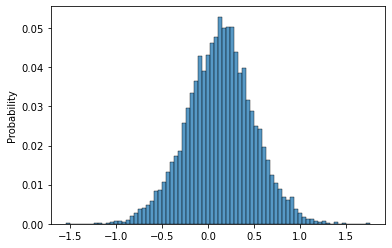

In [13]:
sns.histplot(sample_means, stat='probability')

In [14]:
diabetes = pd.read_csv('diabetes.csv')

In [15]:
X = diabetes.iloc[:, diabetes.columns != 'Outcome'].values
Y = diabetes['Outcome'].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [16]:
#Lets configure Bootstrap

n_iterations = 1000  #No. of bootstrap samples to be repeated (created)
n_size = int(len(X) * 0.50) #Size of sample, picking only 50% of the given data in every bootstrap sample

In [17]:
from sklearn.utils import resample # for Bootstrap sampling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [18]:
#Lets run Bootstrap
scores = []
candidate_indices = np.arange(len(X))
for i in range(n_iterations):
    train_indices = np.random.choice(candidate_indices, size=n_size)
    test_indices = np.setdiff1d(candidate_indices, train_indices)
    
    #prepare train & test sets
    X_train = X[train_indices]
    Y_train = Y[train_indices]
    
    X_test = X[test_indices]
    Y_test = Y[test_indices]
    
    #fit model
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
    
    #evaluate model
    score = model.score(X_test, Y_test) #accuracy score on testing data
    
    scores.append(score)

<AxesSubplot:ylabel='Probability'>

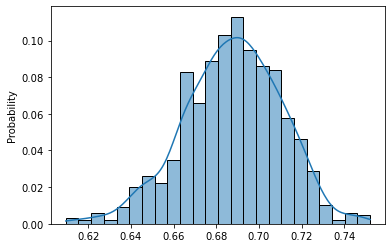

In [19]:
import seaborn as sns
sns.histplot(scores, stat='probability', kde=True)

In [20]:
print("95% confidence interval", np.percentile(scores, 2.5), np.percentile(scores, 97.5))

95% confidence interval 0.6410064239828694 0.7280560518646826


In [22]:
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold, cross_val_score

In [23]:
model = DecisionTreeClassifier()
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, Y, cv = kfold)

In [24]:
results

array([0.62337662, 0.76623377, 0.68831169, 0.5974026 , 0.66233766,
       0.71428571, 0.76623377, 0.77922078, 0.61842105, 0.67105263])

<AxesSubplot:ylabel='Probability'>

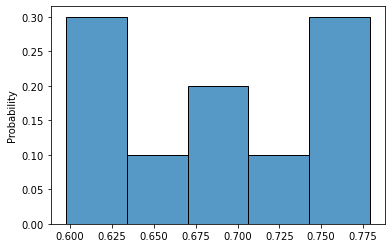

In [25]:
sns.histplot(results, stat='probability')

In [26]:
results.mean()

0.6886876281613123

In [27]:
loocv = LeaveOneOut()
results = cross_val_score(model, X, Y, cv = loocv)

In [28]:
results.mean()

0.7005208333333334

In [29]:
stratkfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=stratkfold)

<AxesSubplot:ylabel='Count'>

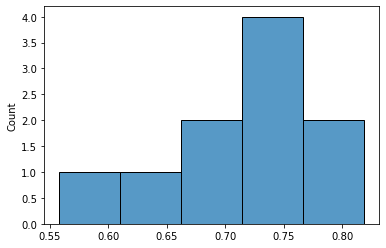

In [30]:
sns.histplot(results)

In [31]:
results.mean()

0.7109022556390977